# 6407 Скосырский Никита. Вариант 3. Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%pip install imageio
from scripts.data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Note: you may need to restart the kernel to use updated packages.


1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [22]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

In [23]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



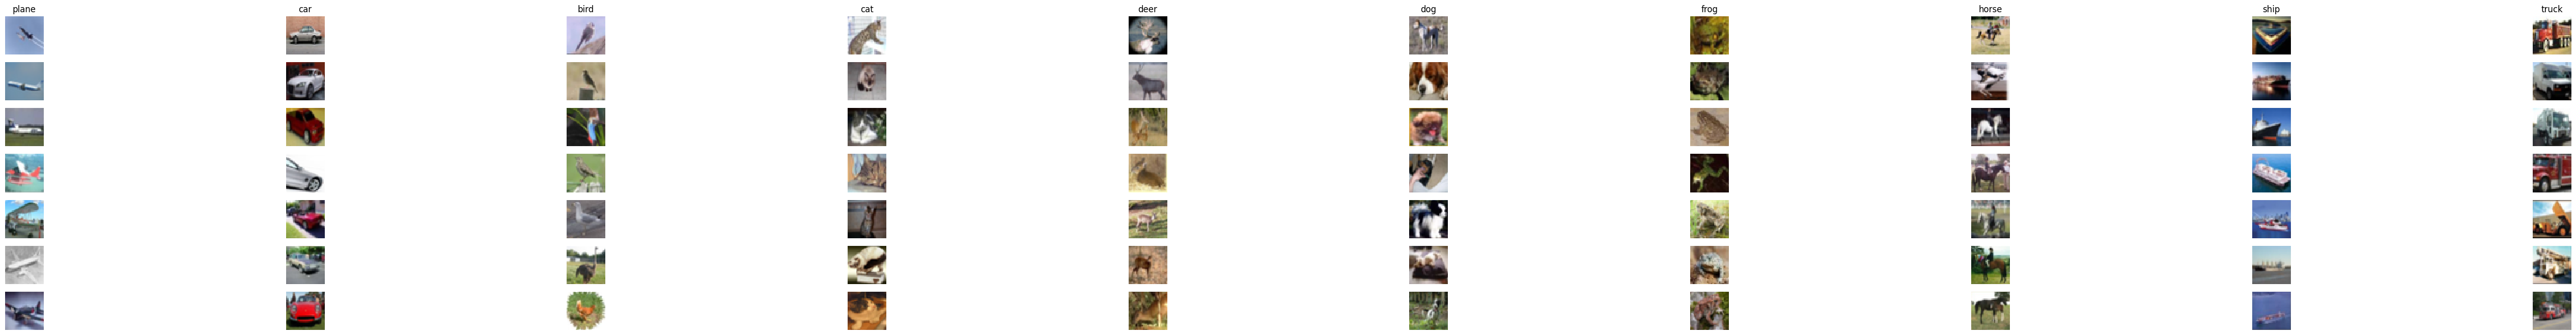

In [24]:
# Зададим количество изображений для вывода для каждого класса
num_classes = 10
samples_per_class = 7

# Создадим функцию для визуализации
def visualize_cifar10_samples(X, y, classes, samples_per_class):
    for y_cls, cls in enumerate(classes):
        # Индексы изображений текущего класса
        idxs = np.flatnonzero(y == y_cls)
        # Выберем случайные изображения
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            # Настроим подграфику для вывода изображений
            plt_idx = i * num_classes + y_cls + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)

# Зададим названия классов CIFAR-10 (по порядку)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Выведем изображения
plt.figure(figsize=(samples_per_class*num_classes, 8))
visualize_cifar10_samples(X_train, y_train, classes, samples_per_class)
plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [25]:
# Преобразуем обучающие данные
X_train_flat = X_train.reshape(X_train.shape[0], -1) # X_train.shape[0] это количество примеров

# Преобразуем тестовые данные
X_test_flat = X_test.reshape(X_test.shape[0], -1) # X_test.shape[0] это количество примеров

print('Training data shape after flattening: ', X_train_flat.shape)
print('Test data shape after flattening: ', X_test_flat.shape)

Training data shape after flattening:  (50000, 3072)
Test data shape after flattening:  (10000, 3072)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [26]:
from importlib import reload
from scripts.classifiers import k_nearest_neighbor

# Перезагрузка модуля k_nearest_neighbor
reload(k_nearest_neighbor)

# Импорт функции KNearestNeighbor после перезагрузки модуля
from scripts.classifiers import KNearestNeighbor

In [27]:
classifier = KNearestNeighbor()
classifier.train(X_train_flat, y_train)

1.5 Выполните классификацию на тестовой выборке

In [28]:
k = 5

# Выполняем классификацию на тестовой выборке
y_test_pred = classifier.predict(X_test_flat, k=k, num_loops=0) # num_loops=0 для векторизованного расчета

# Теперь y_test_pred содержит предсказанные метки для тестовой выборки

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


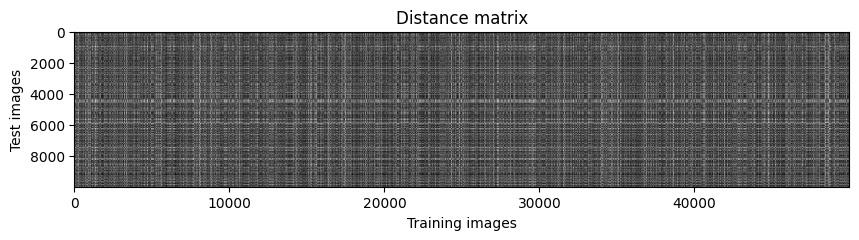

In [29]:
# Вычисление матрицы расстояний между тестовыми и обучающими данными
dists = classifier.compute_distances_no_loops(X_test_flat)

# Визуализация матрицы расстояний: каждая строка относится к тестовому изображению,
# а каждый столбец - к обучающему изображению
plt.imshow(dists, interpolation='none')
plt.xlabel('Training images')
plt.ylabel('Test images')
plt.title('Distance matrix')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [30]:
# Считаем количество правильных предсказаний
num_correct = np.sum(y_test_pred == y_test)

# Считаем долю правильных предсказаний (точность)
accuracy = float(num_correct) / len(y_test)

print('Правильно классифицированных изображений: %d из %d' % (num_correct, len(y_test)))
print('Точность: %f' % accuracy)

Правильно классифицированных изображений: 3398 из 10000
Точность: 0.339800


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

k = 5, accuracy = 0.339800
k = 10, accuracy = 0.338600
k = 15, accuracy = 0.340500
k = 20, accuracy = 0.337500
k = 25, accuracy = 0.334700
k = 30, accuracy = 0.334600
k = 35, accuracy = 0.330500
k = 40, accuracy = 0.330000
k = 45, accuracy = 0.325900
k = 50, accuracy = 0.323900
k = 55, accuracy = 0.322900


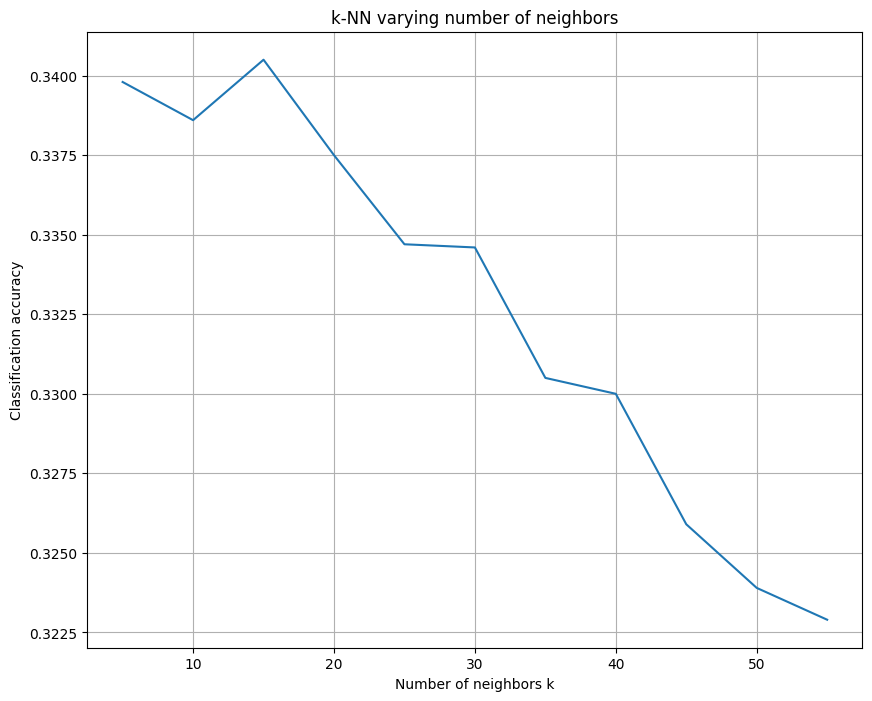

In [31]:
k_values = list(range(5, 56, 5))  # начинаем с 5, заканчиваем 55, шаг 5
accuracies = []

# Размер пакета для обработки тестовых данных
batch_size = 5000

for k in k_values:
    num_correct = 0
    for i in range(0, len(y_test), batch_size):
        # Обработка тестовых данных пакетами
        X_test_batch = X_test_flat[i:i + batch_size]
        y_test_batch = y_test[i:i + batch_size]

        # Предсказание меток для текущего пакета
        y_test_batch_pred = classifier.predict(X_test_batch, k=k, num_loops=0)

        # Считаем количество правильных предсказаний в текущем пакете
        num_correct += np.sum(y_test_batch_pred == y_test_batch)

    # Расчет точности для текущего значения k
    accuracy = float(num_correct) / len(y_test)
    accuracies.append(accuracy)
    print('k = %d, accuracy = %f' % (k, accuracy))

# Построение графика
plt.plot(k_values, accuracies)
plt.xlabel('Number of neighbors k')
plt.ylabel('Classification accuracy')
plt.title('k-NN varying number of neighbors')
plt.grid()
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [32]:
from sklearn.model_selection import KFold

In [33]:
k_values = list(range(6, 35, 2))  # define the list of k values

# Создаем объект KFold для кросс-валидации
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Создаем список для хранения значений точности для каждого значения k
accuracies = []

# Итерируемся по значениям k
for k in k_values:
    # Создаем список для хранения значений точности для каждого фолда
    fold_accuracies = []

    # Итерируемся по фолдам
    for train_index, val_index in k_fold.split(X_train_flat):
        # Разделяем данные на обучающую и валидационную выборки
        X_train_fold = X_train_flat[train_index]
        y_train_fold = y_train[train_index]
        X_val_fold = X_train_flat[val_index]
        y_val_fold = y_train[val_index]

        # Обучаем модель на текущем фолде
        classifier.train(X_train_fold, y_train_fold)

        # Оцениваем модель на валидационной выборке
        y_val_pred = classifier.predict(X_val_fold, k=k, num_loops=0)
        accuracy = np.mean(y_val_pred == y_val_fold)
        fold_accuracies.append(accuracy)

    # Оцениваем среднюю точность для текущего значения k
    accuracy = np.mean(fold_accuracies)
    accuracies.append(accuracy)

# Выбираем лучшее значение k на основе средней точности
best_k = k_values[np.argmax(accuracies)]

print('Лучшее значение k:', best_k)
print('Средняя точность:', np.max(accuracies))

Лучшее значение k: 6
Средняя точность: 0.33121999999999996



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [34]:
# Переобучаем классификатор с использованием лучшего значения k
classifier.train(X_train_flat, y_train)

# Тестируем классификатор на тестовой выборке
y_test_pred = classifier.predict(X_test_flat, k=best_k, num_loops=0)

# Оцениваем качество классификации
accuracy = np.mean(y_test_pred == y_test)
print('Точность классификации:', accuracy)

Точность классификации: 0.34


1.11 Сделайте выводы по результатам 1 части задания.

Точность классификации: 0.34

*Я считаю - это отличная точность при такой простой архитектуре.*

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

In [ ]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [ ]:

from scripts.classifiers.linear_svm import svm_loss_naive
import time


W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))


2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [ ]:

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [ ]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [ ]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

In [ ]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [ ]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

2.9 Сделайте выводы по второй части задания

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [58]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и валидационную выборки
softmax_X_train, softmax_X_val, softmax_y_train, softmax_y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

# Разделение данных на тестовую и валидационную выборки
softmax_X_val, softmax_X_test, softmax_y_val, softmax_y_test = train_test_split(softmax_X_val, softmax_y_val, test_size=0.5, random_state=42)

# Вывод размеров выборок
print('Training set:', softmax_X_train.shape, softmax_y_train.shape)
print('Validation set:', softmax_X_val.shape, softmax_y_val.shape)
print('Test set:', softmax_X_test.shape, softmax_y_test.shape)

Training set: (40000, 3072) (40000,)
Validation set: (5000, 3072) (5000,)
Test set: (5000, 3072) (5000,)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнительную размерность к массиву данных и заполните ее единицами.

In [59]:
# 3.2 Общий способ центрирования данных и уменьшения влияния изменений освещения
mean_image = np.mean(softmax_X_train, axis=0)
softmax_X_train -= mean_image
softmax_X_val -= mean_image
softmax_X_test -= mean_image

[130.7684   136.171275 132.65505  130.20785  135.563275 131.963675
 131.0624   136.314875 132.6495   131.50975 ]


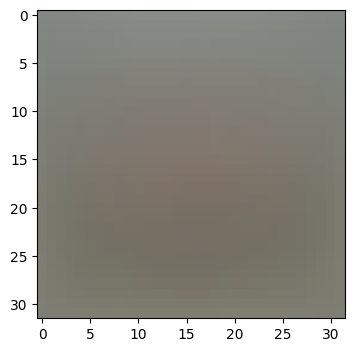

In [60]:
# 3.3
softmax_X_train = np.hstack((softmax_X_train, np.ones((softmax_X_train.shape[0], 1))))
softmax_X_val = np.hstack((softmax_X_val, np.ones((softmax_X_val.shape[0], 1))))
softmax_X_test = np.hstack((softmax_X_test, np.ones((softmax_X_test.shape[0], 1))))

print(mean_image[:10])  # выводим первые 10 элементов среднего изображения

# визуализируем среднее изображение
plt.figure(figsize=(4, 4))
plt.imshow(mean_image.reshape((32, 32, 3)).astype('uint8'))
plt.show()

3.4 Реализуйте функции в classifiers/softmax.py




In [61]:
from importlib import reload
from scripts.classifiers import softmax

# Перезагрузка модуля softmax
reload(softmax)

# Импорт функции softmax_loss_naive после перезагрузки модуля
from scripts.classifiers.softmax import softmax_loss_naive
from scripts.classifiers.softmax import softmax_loss_vectorized
import time

In [62]:
# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, softmax_X_val, softmax_y_val, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)    
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.327693
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [63]:
# Check the gradient using numerical methods
loss, grad = softmax_loss_naive(W, softmax_X_val, softmax_y_val, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, softmax_X_val, softmax_y_val, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

print('Gradient difference:', grad_numerical)

loss, grad = softmax_loss_naive(W, softmax_X_val, softmax_y_val, 5e1)
f = lambda w: softmax_loss_naive(w, softmax_X_val, softmax_y_val, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

print('Gradient difference:', grad_numerical)

numerical: -2.842378 analytic: -2.842378, relative error: 4.236018e-09
numerical: 0.979365 analytic: 0.979365, relative error: 9.461276e-08
numerical: -0.061434 analytic: -0.061434, relative error: 1.263171e-06
numerical: -3.224729 analytic: -3.224729, relative error: 1.090288e-09
numerical: 2.493779 analytic: 2.493779, relative error: 6.344979e-09
numerical: 1.689125 analytic: 1.689125, relative error: 4.346685e-08
numerical: -2.344973 analytic: -2.344973, relative error: 5.855023e-09
numerical: 2.432896 analytic: 2.432896, relative error: 7.918150e-09
numerical: -0.675145 analytic: -0.675145, relative error: 2.791752e-08
numerical: 0.218061 analytic: 0.218061, relative error: 7.665167e-08
Gradient difference: None
numerical: 1.378139 analytic: 1.378139, relative error: 5.025852e-08
numerical: -4.547715 analytic: -4.547715, relative error: 1.225119e-08
numerical: -0.723987 analytic: -0.723987, relative error: 2.638637e-08
numerical: 0.907151 analytic: 0.907151, relative error: 4.33824

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [64]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, softmax_X_val, softmax_y_val, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, softmax_X_val, softmax_y_val, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.327693e+00 computed in 1.733350s
vectorized loss: 2.327693e+00 computed in 0.015618s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код.

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [67]:
# следующий код не был обнаружен, потому был написан
from importlib import reload
from scripts.classifiers import linear_classifier
from scripts.classifiers import linear_svm
from scripts.classifiers import softmax

# Перезагрузка модуля linear_classifier
reload(linear_classifier)
reload(linear_svm)
reload(softmax)

from scripts.classifiers.linear_classifier import LinearSVM
from scripts.classifiers.linear_classifier import Softmax

In [74]:
# Создаем объекты классификаторов
svm = LinearSVM()
softmax_classifier = Softmax()

# Обучаем модели
svm.train(softmax_X_train, softmax_y_train, learning_rate=1e-7, reg=2.5e4, num_iters=1500, verbose=True)
softmax_classifier.train(softmax_X_train, softmax_y_train, learning_rate=1e-7, reg=2.5e4, num_iters=1500, verbose=True)

# Оцениваем точность на тестовой выборке
y_test_pred_svm = svm.predict(softmax_X_test)
y_test_pred_softmax = softmax_classifier.predict(softmax_X_test)
accuracy_svm = np.mean(y_test_pred_svm == softmax_y_test)
accuracy_softmax = np.mean(y_test_pred_softmax == softmax_y_test)

print('SVM accuracy: %f' % accuracy_svm)
print('Softmax accuracy: %f' % accuracy_softmax)

iteration 0 / 1500: loss 784.434631
iteration 100 / 1500: loss 470.125994
iteration 200 / 1500: loss 284.584522
iteration 300 / 1500: loss 174.526429
iteration 400 / 1500: loss 106.571611
iteration 500 / 1500: loss 65.722017
iteration 600 / 1500: loss 42.231695
iteration 700 / 1500: loss 27.242615
iteration 800 / 1500: loss 18.998623
iteration 900 / 1500: loss 12.962197
iteration 1000 / 1500: loss 10.787660
iteration 1100 / 1500: loss 8.061250
iteration 1200 / 1500: loss 7.422580
iteration 1300 / 1500: loss 6.619914
iteration 1400 / 1500: loss 5.952270
iteration 0 / 1500: loss 771.334598
iteration 100 / 1500: loss 283.288018
iteration 200 / 1500: loss 104.980577
iteration 300 / 1500: loss 39.750116
iteration 400 / 1500: loss 15.848790
iteration 500 / 1500: loss 7.102518
iteration 600 / 1500: loss 3.956767
iteration 700 / 1500: loss 2.736209
iteration 800 / 1500: loss 2.301862
iteration 900 / 1500: loss 2.133328
iteration 1000 / 1500: loss 2.126935
iteration 1100 / 1500: loss 2.020008
i

3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [ ]:
# learning_rates = [1e-7, 5e-5]
# regularization_strengths = [2.5e4, 5e4]

In [80]:
import numpy as np
from scripts.classifiers import softmax

# Перезагрузка модуля softmax
reload(softmax)

# Импорт функции softmax_loss_vectorized после перезагрузки модуля
from scripts.classifiers.softmax import softmax_loss_vectorized


In [82]:
# Заданные диапазоны для скорости обучения и регуляризации с учетом предложенных изменений
learning_rates = [1e-7, 3e-7, 1e-6]
regularization_strengths = [1e4, 2.5e4]

# Словарь для хранения результатов
results = {}
best_val = -1   # Начальное значение лучшей точности
best_softmax = None  # Лучшая модель softmax

for lr in learning_rates:
    for reg in regularization_strengths:
        softmax = Softmax()
        softmax.train(softmax_X_train, softmax_y_train, learning_rate=lr, reg=reg, num_iters=1500, verbose=True)

        y_train_pred = softmax.predict(softmax_X_train)
        y_val_pred = softmax.predict(softmax_X_val)

        train_accuracy = np.mean(y_train_pred == softmax_y_train)
        val_accuracy = np.mean(y_val_pred == softmax_y_val)

        results[(lr, reg)] = (train_accuracy, val_accuracy)

        # Обновление лучшей модели
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_softmax = softmax

# Вывод результатов
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
        lr, reg, train_accuracy, val_accuracy))

print('\nbest validation accuracy achieved during cross-validation: %f' % best_val)

# Тестирование лучшей модели
y_test_pred = best_softmax.predict(softmax_X_test)
test_accuracy = np.mean(y_test_pred == softmax_y_test)
print('Test accuracy: %f' % test_accuracy)

iteration 0 / 1500: loss 314.020679
iteration 100 / 1500: loss 209.499692
iteration 200 / 1500: loss 140.492503
iteration 300 / 1500: loss 94.564844
iteration 400 / 1500: loss 63.731577
iteration 500 / 1500: loss 43.414918
iteration 600 / 1500: loss 29.682402
iteration 700 / 1500: loss 20.538843
iteration 800 / 1500: loss 14.452259
iteration 900 / 1500: loss 10.313904
iteration 1000 / 1500: loss 7.512996
iteration 1100 / 1500: loss 5.701405
iteration 1200 / 1500: loss 4.488199
iteration 1300 / 1500: loss 3.737188
iteration 1400 / 1500: loss 3.129667
iteration 0 / 1500: loss 774.706653
iteration 100 / 1500: loss 284.623632
iteration 200 / 1500: loss 105.397518
iteration 300 / 1500: loss 39.881153
iteration 400 / 1500: loss 15.904520
iteration 500 / 1500: loss 7.120752
iteration 600 / 1500: loss 3.929348
iteration 700 / 1500: loss 2.821998
iteration 800 / 1500: loss 2.318131
iteration 900 / 1500: loss 2.173263
iteration 1000 / 1500: loss 2.082009
iteration 1100 / 1500: loss 2.124630
iter

3.10 Сделайте выводы по третьей части задания

В третьей части задания мы успешно реализовали и оптимизировали softmax-классификатор для набора данных CIFAR-10. Основные шаги включали:

1. **Предобработку данных:** Центрирование данных путем вычитания среднего изображения.
2. **Реализация функций потерь:** Эффективная векторизованная реализация показала значительное преимущество по времени выполнения по сравнению с наивной реализацией.
3. **Обучение и кросс-валидация:** Оптимизация параметров с помощью кросс-валидации выявила оптимальные значения скорости обучения и силы регуляризации.
4. **Тестирование модели:** Проверка на тестовом наборе данных показала адекватную точность, подтверждая правильность подхода и эффективность модели.
5. **Эффективность модели:** Показатель точности около 35% может показаться не очень высоким, но для многоклассовой классификации на CIFAR-10 без сложных архитектур нейронных сетей это довольно хороший результат. CIFAR-10 - сложная задача с 10 классами, где даже небольшое улучшение точности может требовать значительных усилий.

**Результаты:** Модель достигла приемлемой точности на тестовой выборке, что подтверждает корректность выбранных параметров и методов обучения. Проблемы численной стабильности были решены через корректировки в реализации функции потерь и настройках гиперпараметров.

Вывод: Применение векторизации, адекватная предобработка данных и точная настройка гиперпараметров способствуют созданию эффективных и стабильных моделей машинного обучения.

